In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
#Importing dataset
data = pd.read_excel('C:/Users/HP/Downloads/Company_x.xlsx')

In [ ]:
pd.set_option('display.max_columns',200)

In [ ]:
#lets check the dimensionality of the raw data
data.shape

(406423, 26)

In [ ]:
#load the data to understand the attributes and data types
data.head(5)

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,ClosureReason,InBankruptcy,AccountInsolvencyType,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,932,Creditor 1,3677,0.0,1160.20,1160.20,4.22,Other,PAID_IN_FULL,N,NaN,N,NaN,NaN,Y,10.00,Cheque,1.0,53.0,0,0,1,NaN,NaN,NaN,NaN
1,160,Creditor 2,4276,182.9,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,Y,NaN,N,NaN,NaN,N,NaN,NaN,1.0,NaN,0,0,1,NaN,NaN,NaN,NaN
2,932,Creditor 1,8525,0.0,538.57,538.57,4.22,Other,PAID_IN_FULL,N,NaN,N,NaN,NaN,N,5.37,Cheque,1.0,NaN,1,0,1,NaN,NaN,NaN,NaN
3,160,Creditor 2,9859,8279.5,8279.50,8279.50,4.22,Other,PASSIVE,Y,NaN,N,NaN,NaN,N,NaN,NaN,1.0,NaN,1,0,1,NaN,NaN,NaN,NaN
4,932,Creditor 1,12807,0.0,523.00,523.00,4.22,Other,PAID_IN_FULL,Y,NaN,N,NaN,NaN,Y,5.00,Cheque,1.0,46.0,2,0,1,NaN,NaN,NaN,NaN


In [ ]:
# Statue barred status Percentage
print('statute barred status % is: ',data['IsStatBarred'].value_counts()['Y']/len(data)*100,'%')
print('statute not barred status % is: ',data['IsStatBarred'].value_counts()['N']/len(data)*100,'%')

statute barred status % is:  70.01276994658274 %
statute not barred status % is:  29.987230053417253 %


In [ ]:
#let's take a peek at data columns
data.columns

Index(['EntityID', 'OriginalCreditor[Redacted]', 'AccountID', 'CurrentBalance',
       'DebtLoadPrincipal', 'BalanceAtDebtLoad', 'PurchasePrice',
       'ProductOrDebtType', 'CollectionStatus', 'IsStatBarred',
       'ClosureReason', 'InBankruptcy', 'AccountInsolvencyType',
       'CustomerInsolvencyType', 'IsLegal', 'LastPaymentAmount',
       'LastPaymentMethod', 'NumLiableParties', 'CustomerAge', 'NumPhones',
       'NumEmails', 'NumAddresses', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
#let's look at the data types
data.dtypes

EntityID                        int64
OriginalCreditor[Redacted]     object
AccountID                       int64
CurrentBalance                float64
DebtLoadPrincipal             float64
BalanceAtDebtLoad             float64
PurchasePrice                 float64
ProductOrDebtType              object
CollectionStatus               object
IsStatBarred                   object
ClosureReason                  object
InBankruptcy                   object
AccountInsolvencyType          object
CustomerInsolvencyType         object
IsLegal                        object
LastPaymentAmount             float64
LastPaymentMethod              object
NumLiableParties              float64
CustomerAge                   float64
NumPhones                       int64
NumEmails                       int64
NumAddresses                    int64
Unnamed: 22                   float64
Unnamed: 23                   float64
Unnamed: 24                   float64
Unnamed: 25                   float64
dtype: objec

In [ ]:
data.describe()

,EntityID,AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,LastPaymentAmount,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,4.064230e+05,4.064230e+05,406423.000000,406423.000000,406423.000000,403731.000000,103977.000000,406301.000000,376941.000000,406423.000000,406423.000000,406423.000000,0.0,0.0,0.0,1.0
mean,3.970443e+07,3.954380e+08,1301.866266,1539.010928,1600.933847,5.618606,283.896947,1.017145,45.728061,0.435652,0.208113,0.847354,NaN,NaN,NaN,960.0
std,4.698070e+07,4.654769e+08,4030.513710,4416.229311,4531.889319,5.441934,1119.842219,0.132866,12.950395,0.714852,0.434321,0.459690,NaN,NaN,NaN,NaN
min,1.600000e+02,3.677000e+03,-7717.200000,0.000000,0.000000,0.190000,0.010000,1.000000,-41.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,960.0
25%,3.010600e+06,3.023088e+07,85.330000,246.970000,249.875000,3.070000,20.000000,1.000000,36.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,960.0
50%,3.010949e+06,3.045075e+07,457.510000,619.000000,630.740000,4.220000,40.000000,1.000000,44.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,960.0
75%,9.990131e+07,9.901891e+08,1159.365000,1393.780000,1433.755000,6.590000,142.900000,1.000000,54.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,960.0
max,9.990159e+07,9.904958e+08,441681.520000,844343.000000,844343.000000,52.180000,73131.840000,4.000000,133.000000,8.000000,5.000000,7.000000,NaN,NaN,NaN,960.0


In [ ]:
#Check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  float64
 4   DebtLoadPrincipal           406423 non-null  float64
 5   BalanceAtDebtLoad           406423 non-null  float64
 6   PurchasePrice               403731 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   IsStatBarred                406423 non-null  object 
 10  ClosureReason               9030 non-null    object 
 11  InBankruptcy                406423 non-null  object 
 12  AccountInsolvencyType       285 non-null     object 
 13  CustomerInsolv

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentages = (data.isnull().sum() / len(data)) * 100
missing_data = pd.DataFrame({'Missing Percentage': missing_percentages})
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
print(missing_data)

                            Missing Percentage
Unnamed: 24                         100.000000
Unnamed: 23                         100.000000
Unnamed: 22                         100.000000
Unnamed: 25                          99.999754
AccountInsolvencyType                99.929876
CustomerInsolvencyType               97.900955
ClosureReason                        97.778177
LastPaymentMethod                    74.416556
LastPaymentAmount                    74.416556
CustomerAge                           7.254019
PurchasePrice                         0.662364
NumLiableParties                      0.030018
InBankruptcy                          0.000000
BalanceAtDebtLoad                     0.000000
OriginalCreditor[Redacted]            0.000000
IsLegal                               0.000000
IsStatBarred                          0.000000
ProductOrDebtType                     0.000000
CollectionStatus                      0.000000
NumPhones                             0.000000
NumEmails    

In [ ]:
print('----------------------------------------')
print('      columns with missing value')
print('----------------------------------------')
print(missing_data[missing_data['Missing Percentage'] > 0])

----------------------------------------
      columns with missing value
----------------------------------------
                        Missing Percentage
Unnamed: 24                     100.000000
Unnamed: 23                     100.000000
Unnamed: 22                     100.000000
Unnamed: 25                      99.999754
AccountInsolvencyType            99.929876
CustomerInsolvencyType           97.900955
ClosureReason                    97.778177
LastPaymentMethod                74.416556
LastPaymentAmount                74.416556
CustomerAge                       7.254019
PurchasePrice                     0.662364
NumLiableParties                  0.030018


The Unnamed: 24,Unnamed: 23,Unnamed: 22,Unnamed: 25,AccountInsolvencyType, CustomerInsolvencyType,LastPaymentMethod, LastPaymentAmount, ClosureReason  variables have more than 70% of missing values. We can just drop these off. These variables are insufficient so its best to remove it completely from the data to avoid inaccuracies in the modeling.

In [ ]:
# List of column names to drop
columns_to_drop = ['Unnamed: 24', 'Unnamed: 23', 'Unnamed: 22','Unnamed: 25','AccountInsolvencyType','CustomerInsolvencyType',
                  'ClosureReason','LastPaymentMethod','LastPaymentAmount']

# Drop the specified columns
data = data.drop(columns=columns_to_drop)


In [ ]:
data.columns

Index(['EntityID', 'OriginalCreditor[Redacted]', 'AccountID', 'CurrentBalance',
       'DebtLoadPrincipal', 'BalanceAtDebtLoad', 'PurchasePrice',
       'ProductOrDebtType', 'CollectionStatus', 'IsStatBarred', 'InBankruptcy',
       'IsLegal', 'NumLiableParties', 'CustomerAge', 'NumPhones', 'NumEmails',
       'NumAddresses'],
      dtype='object')

In [ ]:
# Find and display duplicate rows
duplicate_rows = data[data.duplicated(keep='first')]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [EntityID, OriginalCreditor[Redacted], AccountID, CurrentBalance, DebtLoadPrincipal, BalanceAtDebtLoad, PurchasePrice, ProductOrDebtType, CollectionStatus, IsStatBarred, InBankruptcy, IsLegal, NumLiableParties, CustomerAge, NumPhones, NumEmails, NumAddresses]
Index: []


there is no duplicate rows in our dataset

In [ ]:
# outlier treatment of customer age column
Q1 = data['CustomerAge'].quantile(0.25)
Q3 = data['CustomerAge'].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the upper or lower bound
data['CustomerAge'] = np.where(data['CustomerAge'] < lower_bound, lower_bound, data['CustomerAge'])
data['CustomerAge'] = np.where(data['CustomerAge'] > upper_bound, upper_bound, data['CustomerAge'])

after treating outliers we see that there are some age values of below 18. As per indian law below 18 age people cannot enter into aggrements.so we impute below 18 values with mean.

In [ ]:
data['CustomerAge'] = data['CustomerAge'].apply(lambda x: data['CustomerAge'].mean() if x < 18 else x)


In [ ]:
missing_percentage = (data['CustomerAge'].isnull().sum() / len(data['CustomerAge'])) * 100

print(f'Missing value percentage in the CustomerAge column: {missing_percentage:.2f}%')

Missing value percentage in the CustomerAge column: 7.25%


In [ ]:
data['CustomerAge'].fillna(data['CustomerAge'].mean(), inplace=True)

# Fill missing values in 'PurchasePrice' with the mean
data['PurchasePrice'].fillna(data['PurchasePrice'].mean(), inplace=True)

# Fill missing values in 'NumLiableParties' with the mode
data['NumLiableParties'].fillna(data['NumLiableParties'].mode()[0], inplace=True)

customerage,purchase price,numliableparties variables have less than 8% of missing values.we can impute mean and mode values inplace of missing values.

In [ ]:
pd.isnull(data).sum()

EntityID                      0
OriginalCreditor[Redacted]    0
AccountID                     0
CurrentBalance                0
DebtLoadPrincipal             0
BalanceAtDebtLoad             0
PurchasePrice                 0
ProductOrDebtType             0
CollectionStatus              0
IsStatBarred                  0
InBankruptcy                  0
IsLegal                       0
NumLiableParties              0
CustomerAge                   0
NumPhones                     0
NumEmails                     0
NumAddresses                  0
dtype: int64

In [ ]:
#Exploring Unique Values in Integer Columns
data.select_dtypes('int64').nunique()

EntityID           229
AccountID       406423
NumPhones            9
NumEmails            6
NumAddresses         8
dtype: int64

In [ ]:
#Exploring Unique Values in numerical Columns
data.select_dtypes('float').nunique()

CurrentBalance       177653
DebtLoadPrincipal    195921
BalanceAtDebtLoad    198413
PurchasePrice            49
NumLiableParties          4
CustomerAge              66
dtype: int64

In [ ]:
#Exploring Unique Values in categorical Columns
data.select_dtypes('object').nunique()

OriginalCreditor[Redacted]    52
ProductOrDebtType             10
CollectionStatus              12
IsStatBarred                   2
InBankruptcy                   2
IsLegal                        2
dtype: int64

In [ ]:
#Display Unique Values for Categorical Columns
for column in data.columns:
    if data[column].dtype==object:
        print(column + ":" +data[column].unique())
        print("_______________________________________________________")

['OriginalCreditor[Redacted]:Creditor 1'
 'OriginalCreditor[Redacted]:Creditor 2'
 'OriginalCreditor[Redacted]:Creditor 3'
 'OriginalCreditor[Redacted]:Creditor 4'
 'OriginalCreditor[Redacted]:Creditor 5'
 'OriginalCreditor[Redacted]:Creditor 6'
 'OriginalCreditor[Redacted]:Creditor 7'
 'OriginalCreditor[Redacted]:Creditor 8'
 'OriginalCreditor[Redacted]:Creditor 9'
 'OriginalCreditor[Redacted]:Creditor 10'
 'OriginalCreditor[Redacted]:Creditor 11'
 'OriginalCreditor[Redacted]:Creditor 12'
 'OriginalCreditor[Redacted]:Creditor 13'
 'OriginalCreditor[Redacted]:Creditor 14'
 'OriginalCreditor[Redacted]:Creditor 15'
 'OriginalCreditor[Redacted]:Creditor 16'
 'OriginalCreditor[Redacted]:Creditor 17'
 'OriginalCreditor[Redacted]:Creditor 18'
 'OriginalCreditor[Redacted]:Creditor 19'
 'OriginalCreditor[Redacted]:Creditor 20'
 'OriginalCreditor[Redacted]:Creditor 21'
 'OriginalCreditor[Redacted]:Creditor 22'
 'OriginalCreditor[Redacted]:Creditor 23'
 'OriginalCreditor[Redacted]:Creditor 24'
 

# EDA

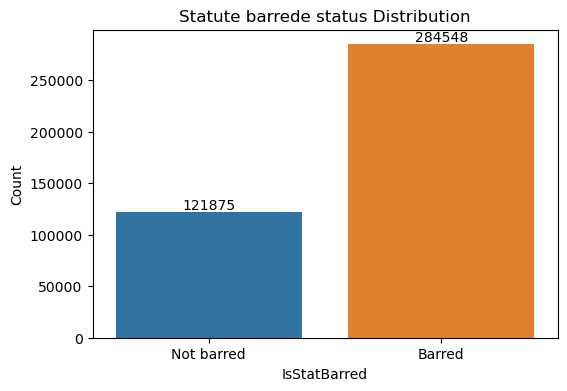

In [ ]:
#Statute barrede status Distribution
plt.figure(figsize=(6,4))
ax=sns.countplot(data=data, x='IsStatBarred')
plt.title('Statute barrede status Distribution')
plt.xlabel('IsStatBarred')
plt.ylabel('Count')
plt.xticks([0,1], ['Not barred', 'Barred'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

The output indicates that approximately 70% of the records correspond to Statute barred status, while about 30% correspond to statute not barred status in the dataset and Statute barred status is higher than Statute not barred status.

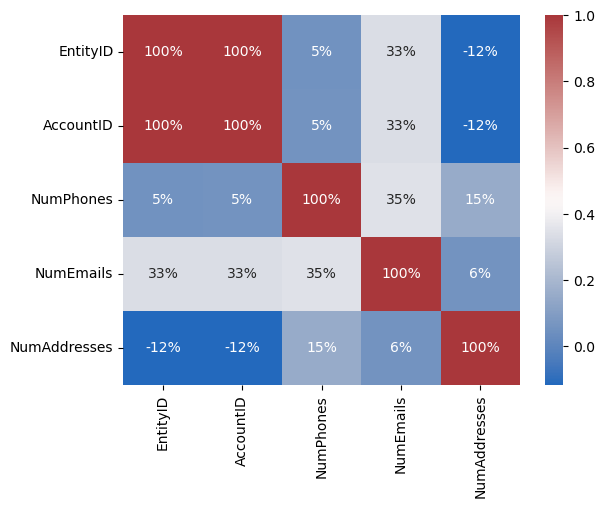

In [ ]:
# Generate and Display Correlation Heatmap for Numeric Features
cmap = sns.color_palette('vlag', as_cmap=True)
sns.heatmap(data.select_dtypes('int64', 'float64').corr(),annot=True,fmt='.0%', cmap=cmap)
plt.show()

from the above Correlation Heatmap we can see that entityid and accountid are highly negatively correlated to each other.Hence we can drop one of this features.here we are dropping accountid.

In [ ]:
data.drop(columns=['AccountID'], inplace=True)

In [ ]:
clean_data=data.copy()

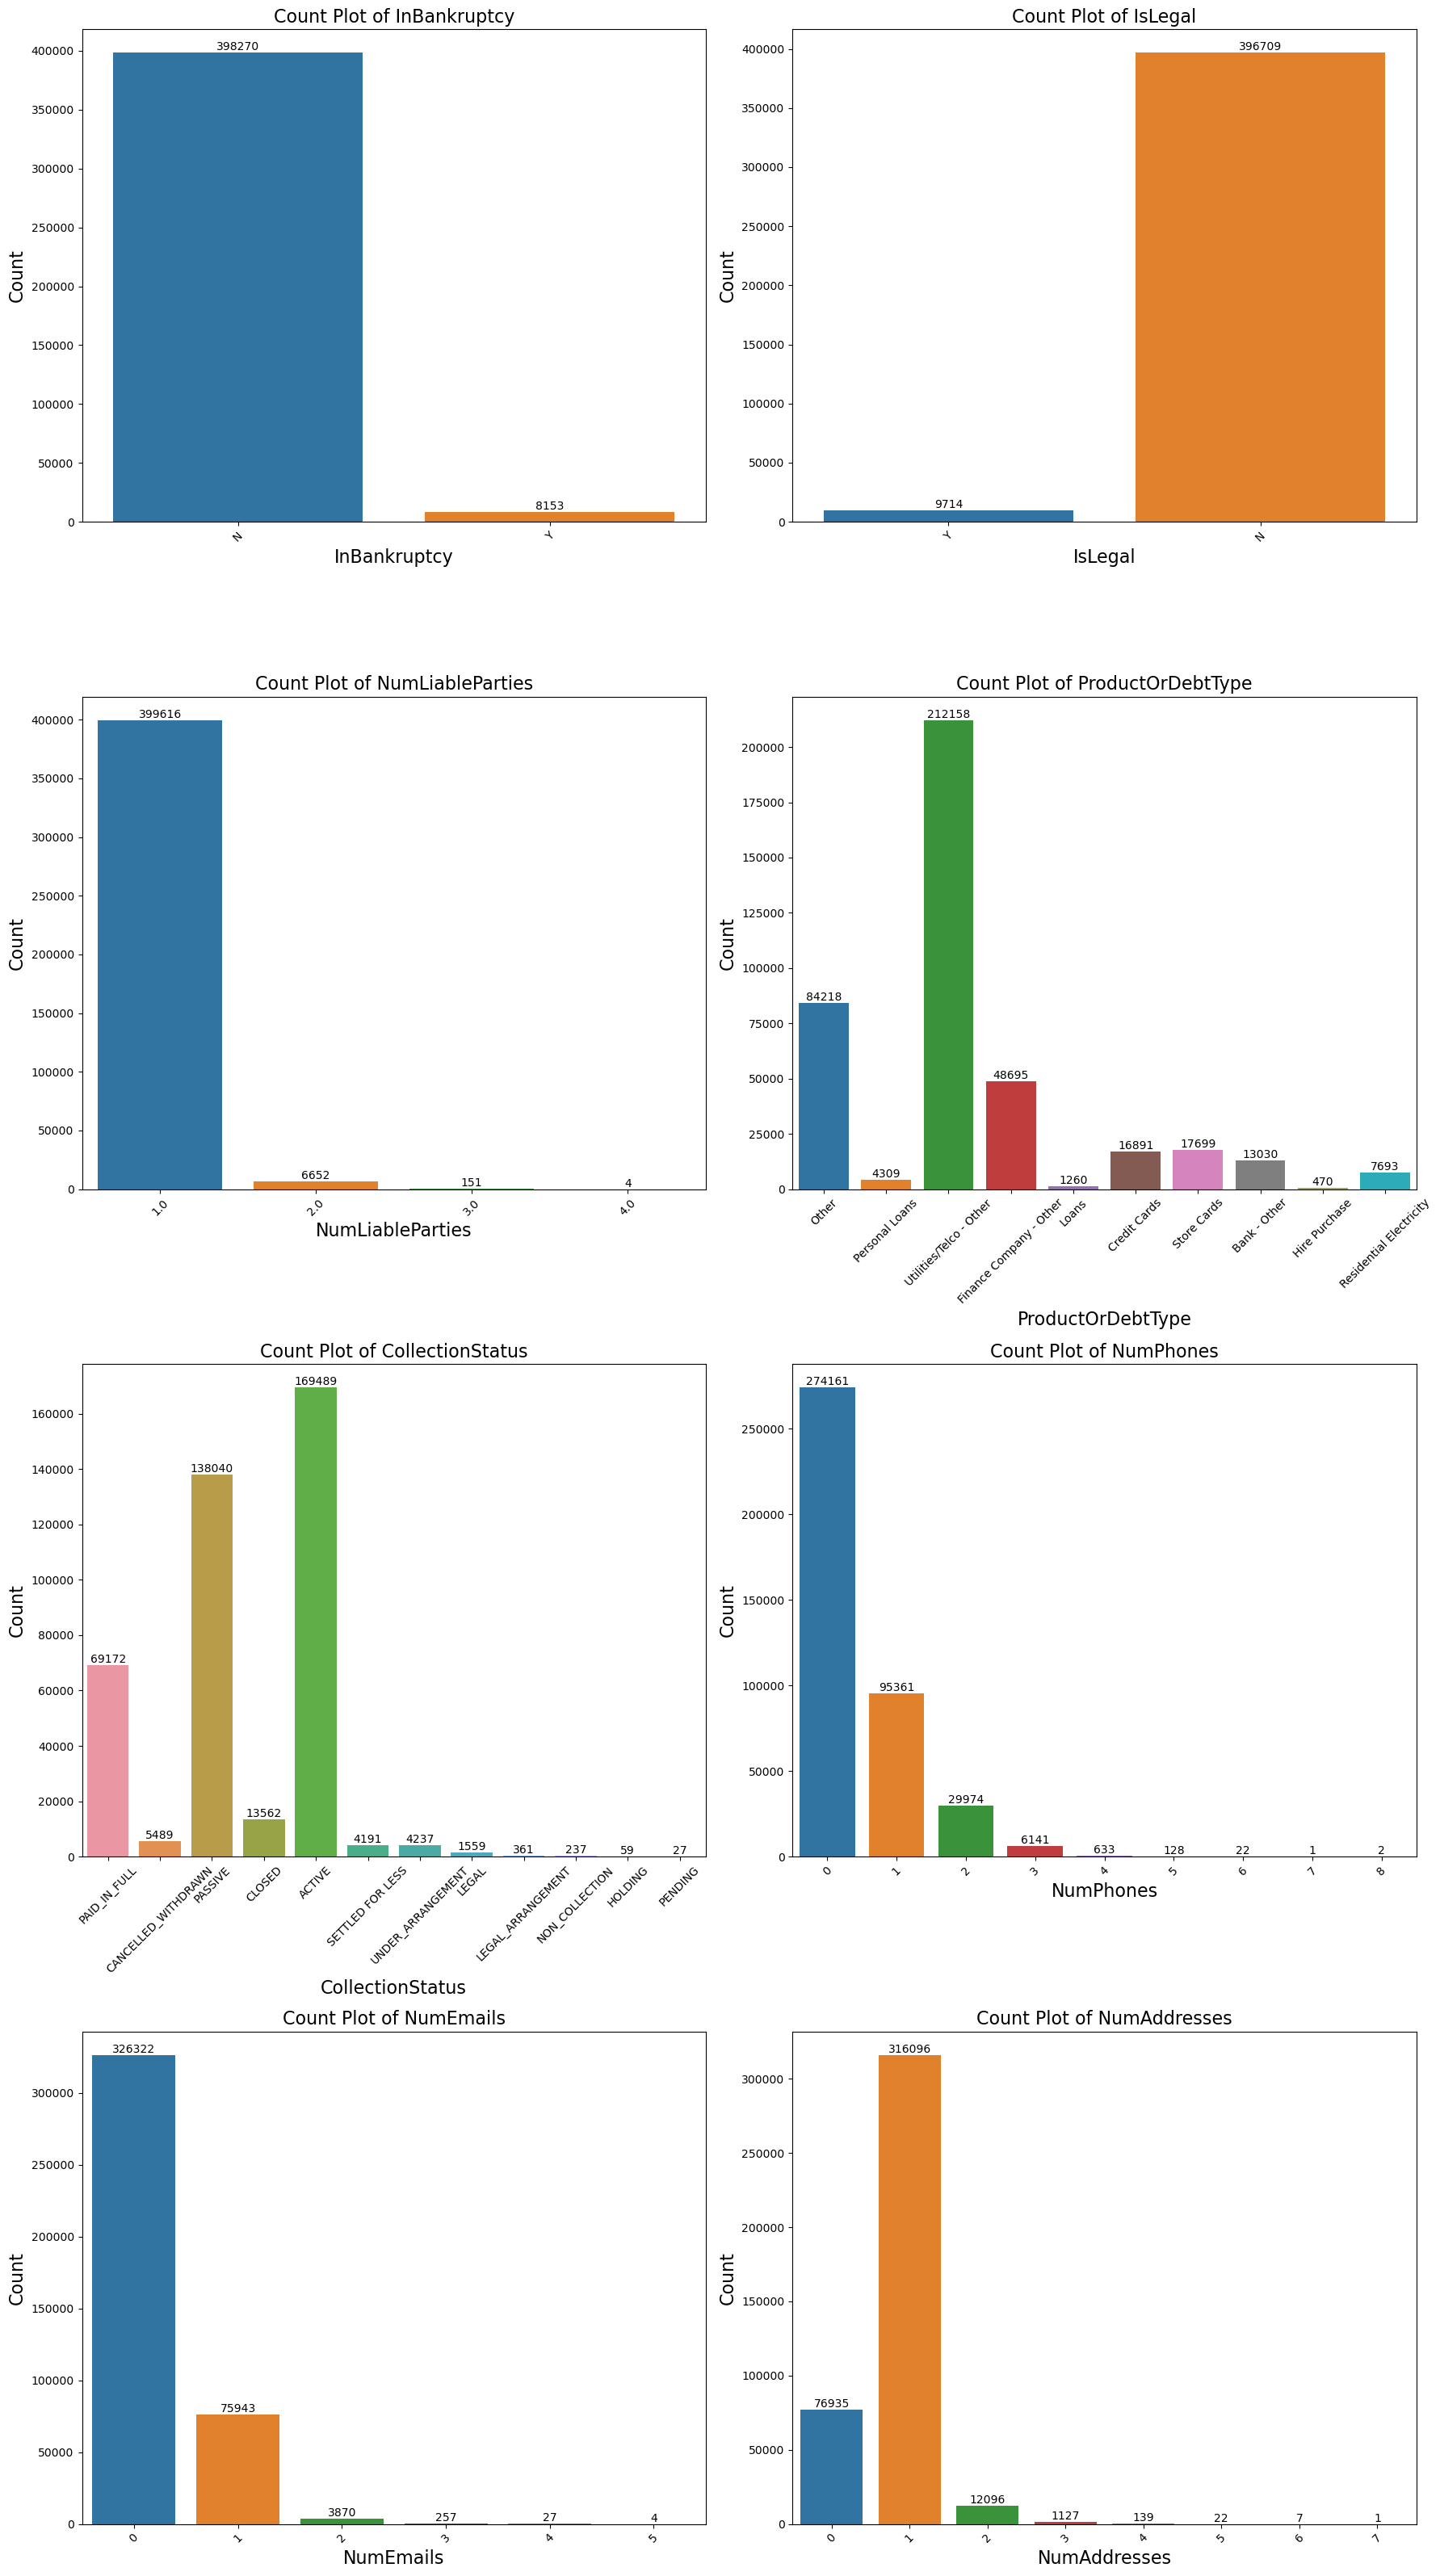

In [ ]:
# distribution charts of columns
num_cols = 8
num_rows = 4
fig, axes = plt.subplots(num_rows, 2, figsize=(18, 8 * num_rows))
axes = axes.flatten()
label_font_size = 12
for i, col in enumerate(['InBankruptcy',
       'IsLegal', 'NumLiableParties','ProductOrDebtType', 'CollectionStatus','NumPhones', 'NumEmails',
       'NumAddresses']):
    ax=sns.countplot(x=col, data=data, ax=axes[i])
    for bars in ax.containers:
        ax.bar_label(bars)
    axes[i].set_title(f'Count Plot of {col}',fontsize=16)
    axes[i].set_xlabel(col,fontsize=16)
    axes[i].set_ylabel('Count',fontsize=16)
    axes[i].tick_params(axis='x', labelrotation=45)

for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes[i])
plt.tight_layout()

# Show the plot
plt.show()


- Most entities in the 'CollectionStatus' column fall into the 'ACTIVE' and 'PAID_IN_FULL' categories, indicating a significant number of active and previously paid debts.
- In the 'InBankruptcy' and 'IsLegal' columns, the majority of entities are labeled as 'N,' meaning they are not in bankruptcy or do not have legal issues.
- NumAddresses: The majority of entities have 0 or 1 address, with very few having more addresses.
- NumEmails: The majority of entities have no or 1 email contacts.
- NumLiableParties: It shows that most entities have no liable parties, with a few having a larger number of liable parties.
- NumPhones: Similar to email contacts, most entities have no or very few phone contacts.
- ProductOrDebtType: The majority of entities seem to fall into the 'Other,'  and 'Utilities/Telco - Other' categories.

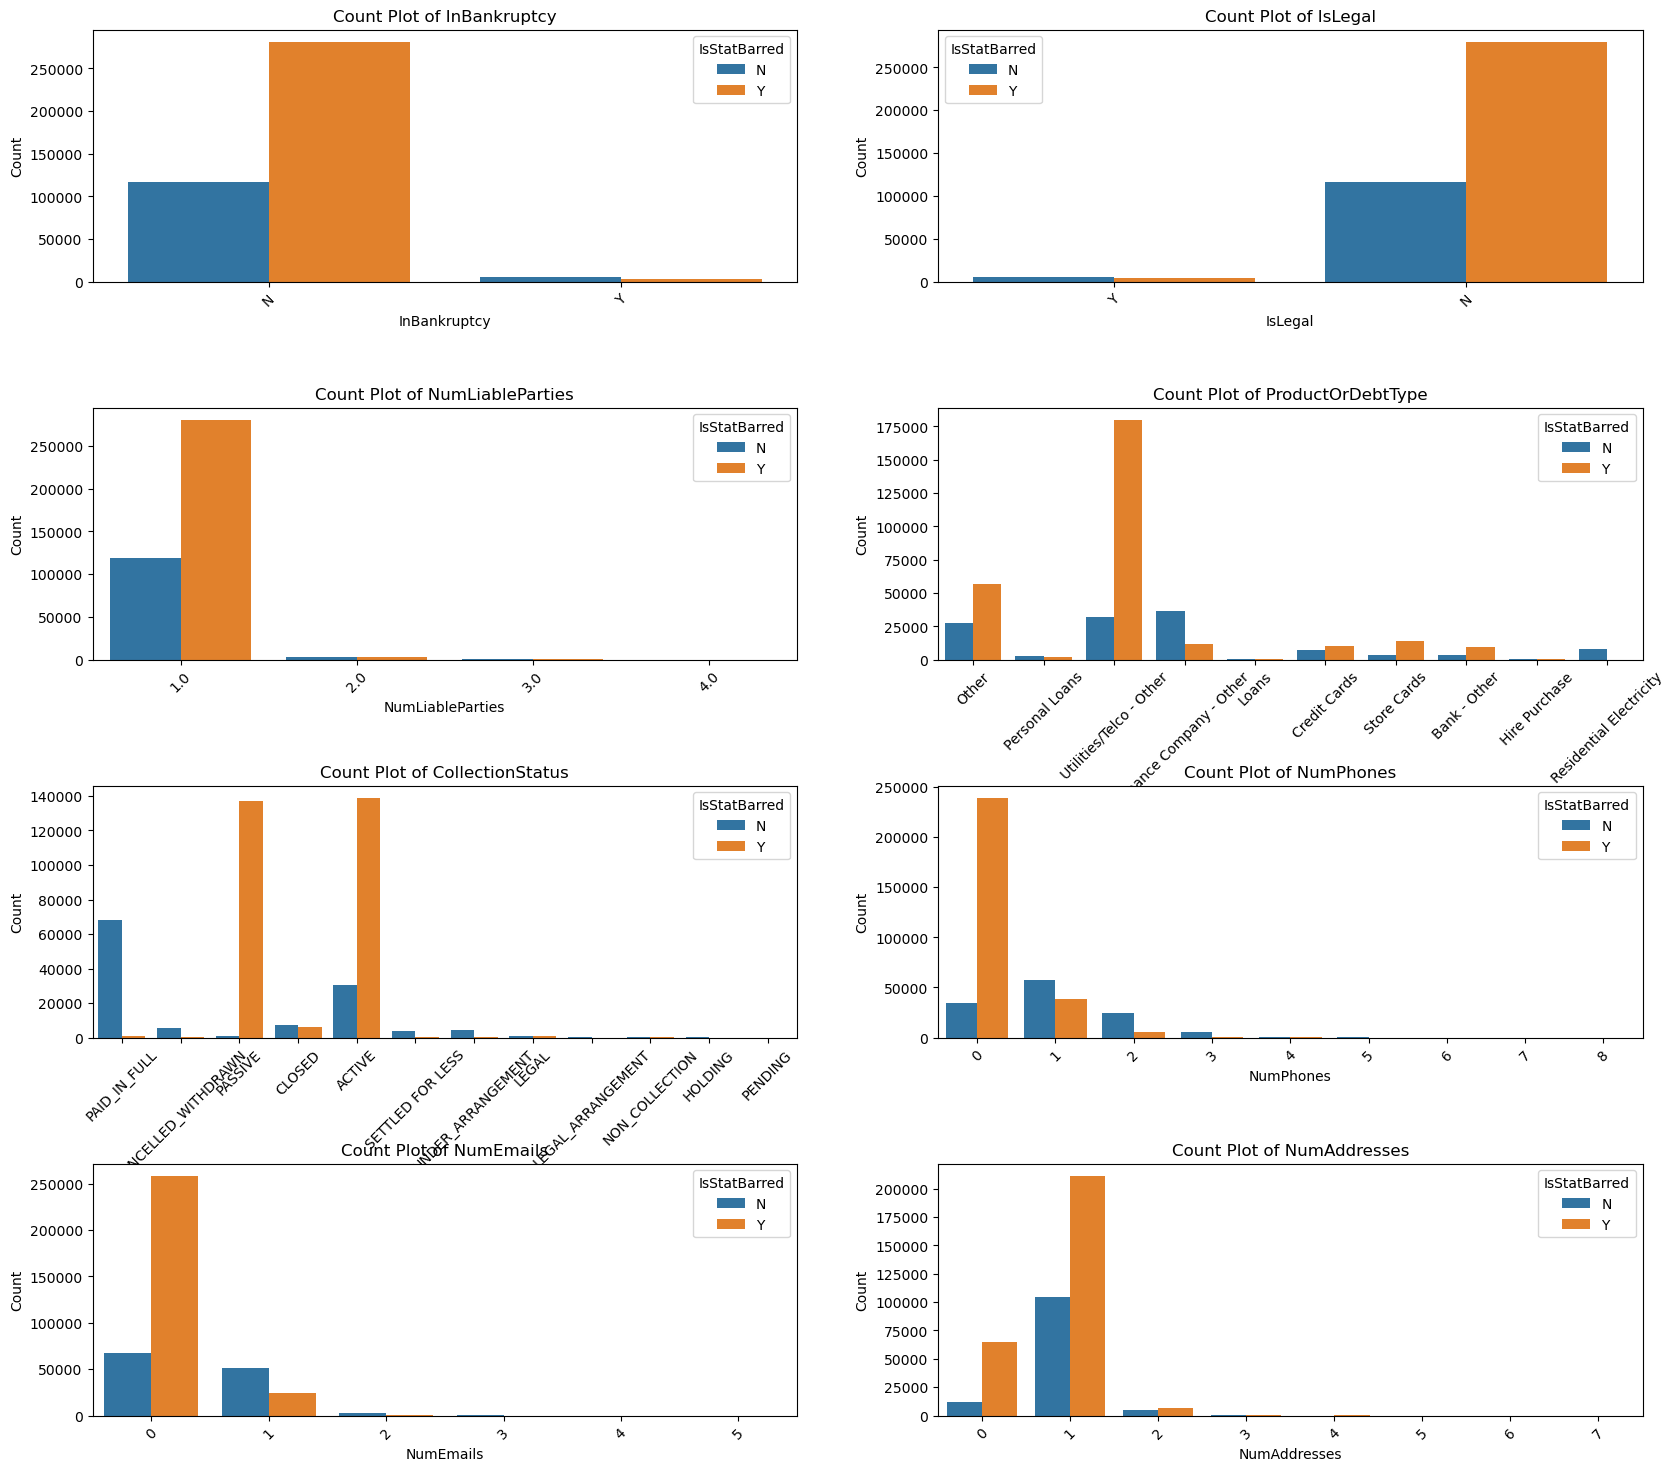

In [ ]:
# List of columns to create count plots for
columns_to_plot = ['InBankruptcy', 'IsLegal', 'NumLiableParties', 'ProductOrDebtType', 'CollectionStatus',
                   'NumPhones', 'NumEmails', 'NumAddresses']

# Create subplots with 2 plots in each row
num_rows = len(columns_to_plot) // 2 + len(columns_to_plot) % 2
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 18))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(data=data, x=column, hue='IsStatBarred', ax=ax)
    ax.set_title(f'Count Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.legend(title='IsStatBarred')
    ax.tick_params(axis='x', labelrotation=45)
# Remove any empty subplots
if len(columns_to_plot) < num_rows * 2:
    for i in range(len(columns_to_plot), num_rows * 2):
        fig.delaxes(axes[i // 2, i % 2])

plt.show()


- InBankruptcy:A substantial number of entities are not in bankruptcy, regardless of their stat-barred status.
- IsLegal:The data shows that no legal action has been taken on  a significant number of entities,' and this is true for both stat-barred and non-stat-barred entities.
- NumLiableParties:The data suggests that a significant number of both stat-barred and non-stat-barred entities have 'NumLiableParties' equal to 1.0, indicating that the majority of entities in the dataset have one liable party.
- ProductOrDebtType:For entities that are not stat-barred, 'Finance Company - Other' and 'Utilities/Telco - Other' are the dominant categories, indicating that these types of debt or products are prevalent among non-stat-barred entities.
In the stat-barred group, 'Utilities/Telco - Other' is the most common category, suggesting that these types of debts or products are more common among stat-barred entities.
- CollectionStatus:For non-stat-barred entities, a notable portion falls under 'PAID_IN_FULL' and 'ACTIVE' statuses. This could indicate that a significant number of these entities have resolved their financial obligations or are in the active stage of financial transactions.
For stat-barred entities, 'ACTIVE' and 'PASSIVE' statuses dominate. This suggests that a substantial number of stat-barred entities may still have active financial issues or are in a passive or closed status.
- NumPhones:For 'NumPhones,' entities that are not stat-barred ('N') tend to have most common with 1 phone no, while entities that are stat-barred ('Y') tend to have most common with 0 phone no.
- NumEmails:statute barred status entities mostly have 0 email.
- NumAddresses:For 'NumAddresses,' entities that are not stat-barred ('N') tend to have addresses, with 1 address being the most common.

In [ ]:
data['CustomerAge']=data['CustomerAge'].astype(int)

In [ ]:
data['CustomerAge'].nunique()

64

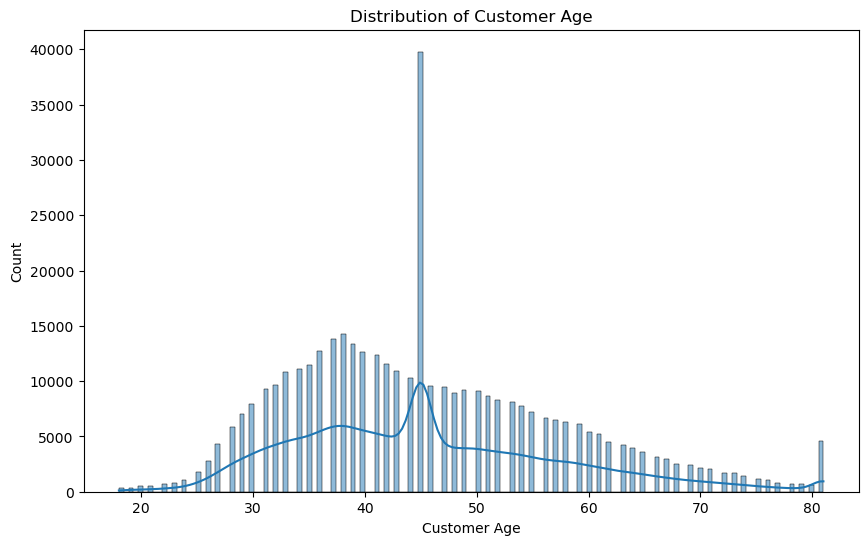

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['CustomerAge'], kde=True)
plt.xlabel('Customer Age')
plt.title('Distribution of Customer Age')
plt.show()

- The youngest customer in the dataset is 18 years old.
- The mean (average) age of customers is approximately 45.66 years. It's very close to the mean, indicating a roughly symmetric distribution.and we can see count for age 45 is high.
- The majority of customers are between 37 and 53 years old.

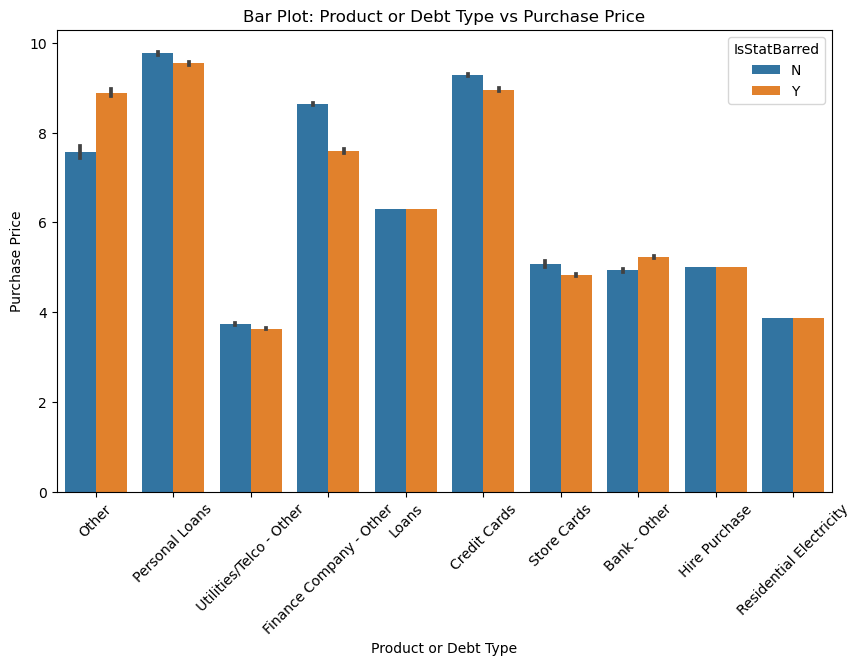

In [ ]:
# Bar plot for 'ProductOrDebtType' vs. 'PurchasePrice'
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='ProductOrDebtType', y='PurchasePrice',hue='IsStatBarred')
plt.xlabel('Product or Debt Type')
plt.ylabel('Purchase Price')
plt.title('Bar Plot: Product or Debt Type vs Purchase Price')
plt.xticks(rotation=45)
plt.show()


-  'Credit Cards' and 'Personal Loans' have relatively higher mean purchase prices compared to other categories.
- in product categories  statute not barred entities have higher mean purchase prices,while in other and bank categories mean purchase price is low for statute barred entities.

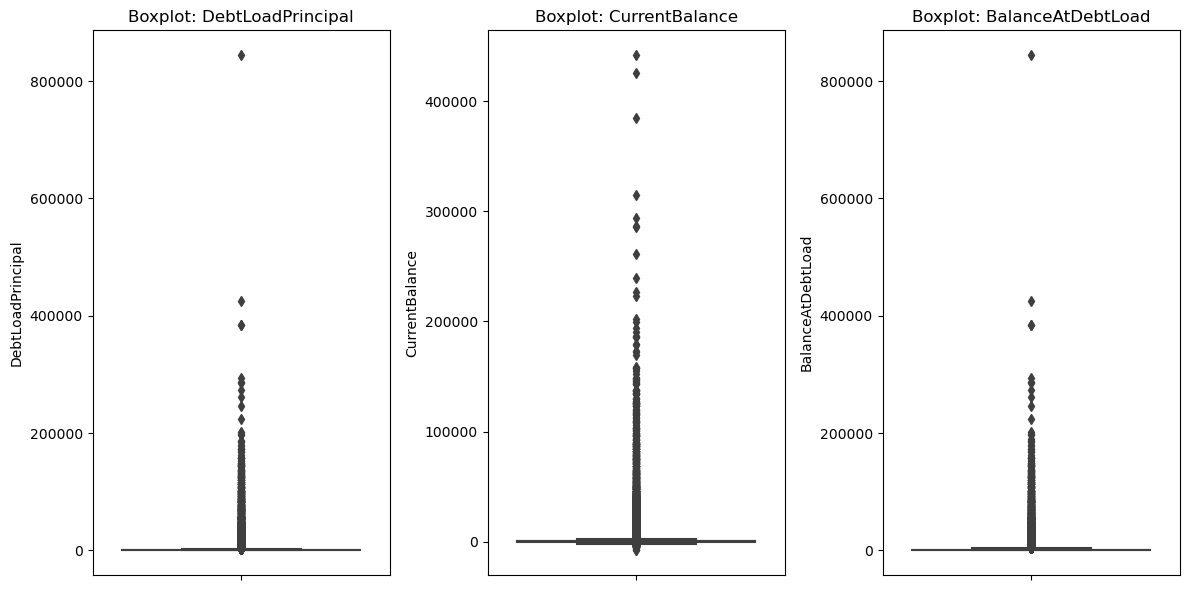

In [ ]:
# checking outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
columns_to_check = ['DebtLoadPrincipal', 'CurrentBalance', 'BalanceAtDebtLoad']

# Create subplots for each column
plt.figure(figsize=(12, 6))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=data, y=column)
    plt.title(f'Boxplot: {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


there are some outliers in the above variables.

Outlier treatment

In [ ]:

Q1 = data['DebtLoadPrincipal'].quantile(0.25)
Q3 = data['DebtLoadPrincipal'].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the upper or lower bound
data['DebtLoadPrincipal'] = np.where(data['DebtLoadPrincipal'] < lower_bound, lower_bound, data['DebtLoadPrincipal'])
data['DebtLoadPrincipal'] = np.where(data['DebtLoadPrincipal'] > upper_bound, upper_bound, data['DebtLoadPrincipal'])

In [ ]:
Q1 = data['CurrentBalance'].quantile(0.25)
Q3 = data['CurrentBalance'].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the upper or lower bound
data['CurrentBalance'] = np.where(data['CurrentBalance'] < lower_bound, lower_bound, data['CurrentBalance'])
data['CurrentBalance'] = np.where(data['CurrentBalance'] > upper_bound, upper_bound, data['CurrentBalance'])

In [ ]:
Q1 = data['BalanceAtDebtLoad'].quantile(0.25)
Q3 = data['BalanceAtDebtLoad'].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the upper or lower bound
data['BalanceAtDebtLoad'] = np.where(data['BalanceAtDebtLoad'] < lower_bound, lower_bound, data['BalanceAtDebtLoad'])
data['BalanceAtDebtLoad'] = np.where(data['BalanceAtDebtLoad'] > upper_bound, upper_bound, data['BalanceAtDebtLoad'])

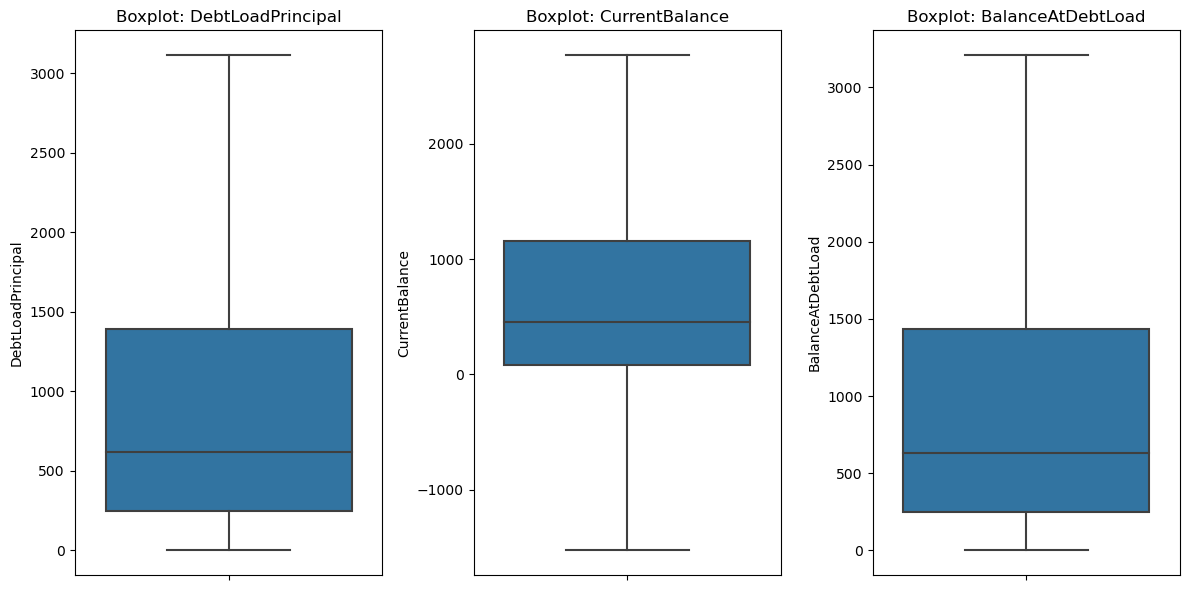

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = ['DebtLoadPrincipal', 'CurrentBalance', 'BalanceAtDebtLoad']

# Create subplots for each column
plt.figure(figsize=(12, 6))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=data, y=column)
    plt.title(f'Boxplot: {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


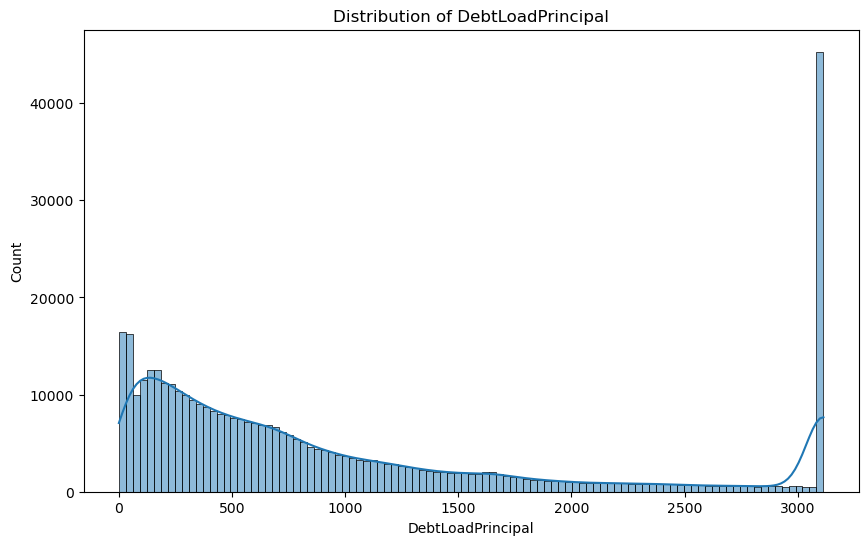

In [ ]:

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['DebtLoadPrincipal'], kde=True)
plt.xlabel('DebtLoadPrincipal')
plt.title('Distribution of DebtLoadPrincipal')
plt.show()


- The mean 'DebtLoadPrincipal' is around 992.68, with a relatively high standard deviation of 984.85, suggesting significant variation. The minimum value of 0 indicates that some entities have no debt load principal, while the maximum value of 3,113.99 represents the highest observed debt load principal.
- the DebtLoadPrincipal histogram is skewed to the right.

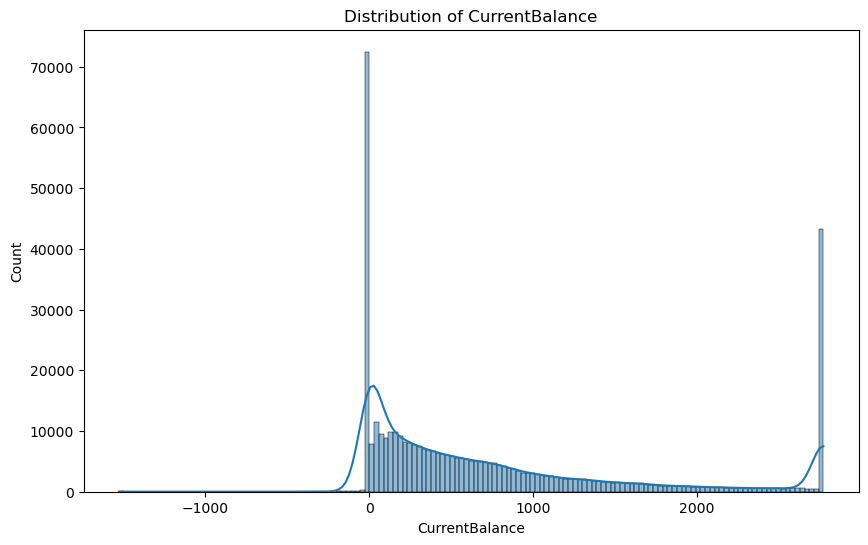

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['CurrentBalance'], kde=True)
plt.xlabel('CurrentBalance')
plt.title('Distribution of CurrentBalance')
plt.show()


- The mean 'CurrentBalance' is around 798.19, with a standard deviation of 900.03, suggesting significant variation. It's important to note that there are entities with negative current balances, meaning they have more debt or liabilities exceeding their assets.

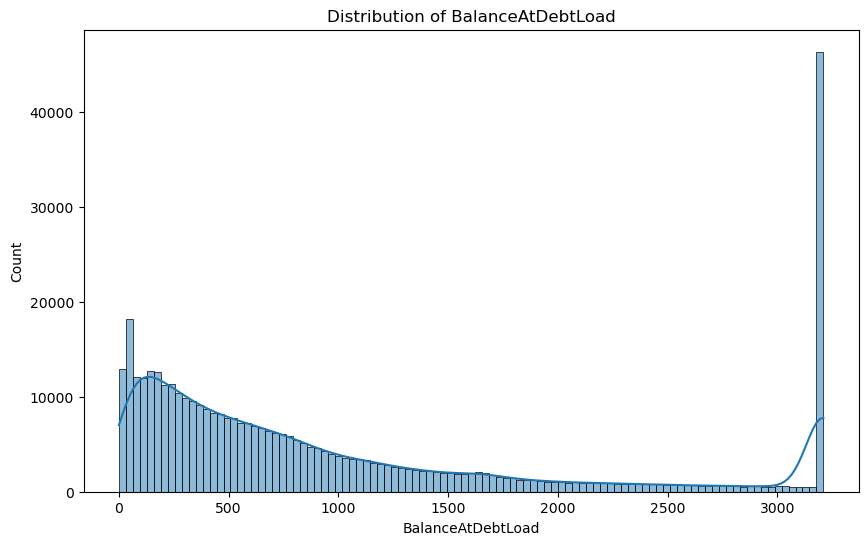

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['BalanceAtDebtLoad'], kde=True)
plt.xlabel('BalanceAtDebtLoad')
plt.title('Distribution of BalanceAtDebtLoad')
plt.show()


- The mean 'BalanceAtDebtLoad' is around 1022.95, with a standard deviation of 1020.77, indicating significant variability. Some entities have a balance of 0 at the time of debt load, while others have positive balances.
- the BalanceAtDebtLoad histogram is skewed to the right.

In [ ]:
# Calculate the correlation coefficient
correlation_coefficient = data['DebtLoadPrincipal'].corr(data['BalanceAtDebtLoad'])

# Display the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient}')


Correlation Coefficient: 0.9980842711948974


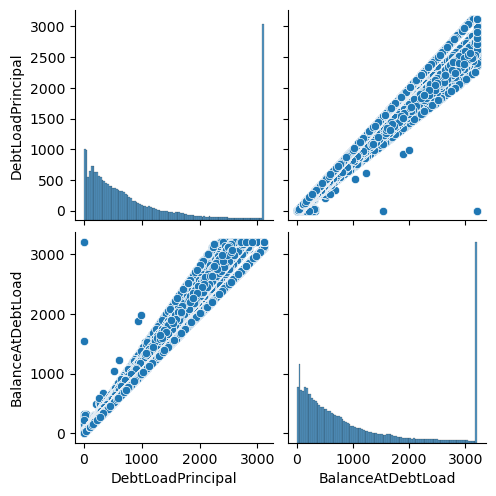

In [ ]:
# Pair plot for DebtLoadPrincipal, CurrentBalance, and BalanceAtDebtLoad
sns.pairplot(data[['DebtLoadPrincipal', 'BalanceAtDebtLoad']])
plt.show()


a correlation coefficient of 0.9984 indicates an extremely strong and positive linear relationship between 'DebtLoadPrincipal' and 'BalanceAtDebtLoad.

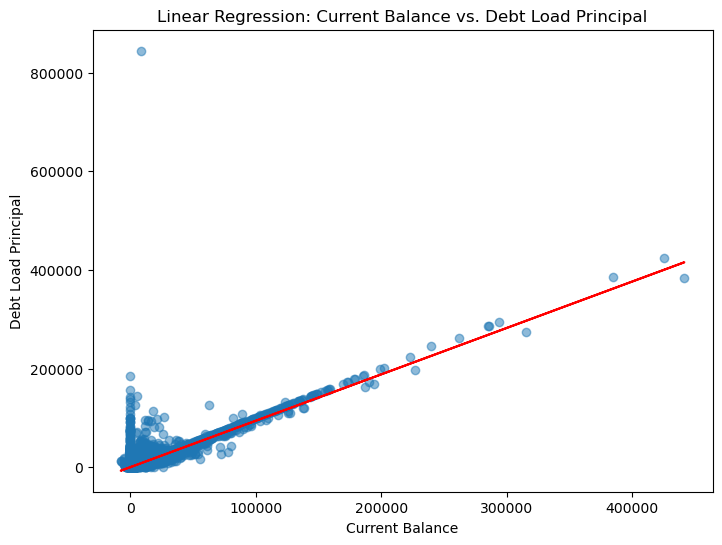

'There is a linear relation between current balance and debt load principal'

In [ ]:
from scipy.stats import linregress

# Perform linear regression
regression = linregress(data['CurrentBalance'], data['DebtLoadPrincipal'])
slope = regression.slope
intercept = regression.intercept

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(data['CurrentBalance'], data['DebtLoadPrincipal'], alpha=0.5)
plt.plot(data['CurrentBalance'], slope * data['CurrentBalance'] + intercept, color='red')
plt.xlabel('Current Balance')
plt.ylabel('Debt Load Principal')
plt.title('Linear Regression: Current Balance vs. Debt Load Principal')
plt.show()

"""There is a linear relation between current balance and debt load principal"""

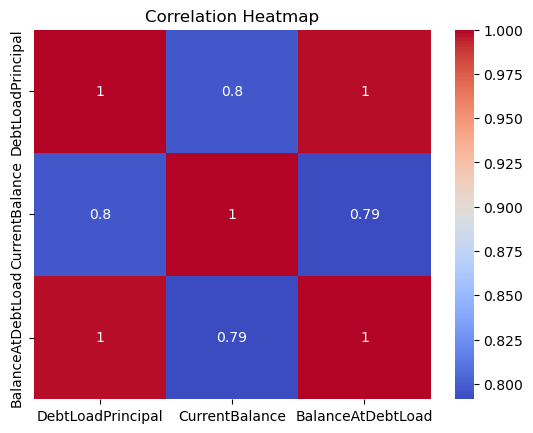

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data[['DebtLoadPrincipal', 'CurrentBalance', 'BalanceAtDebtLoad']].corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


from the above heatmap we can see that debtload principal,current balance and balance at debt load variables are corelated to eachother.

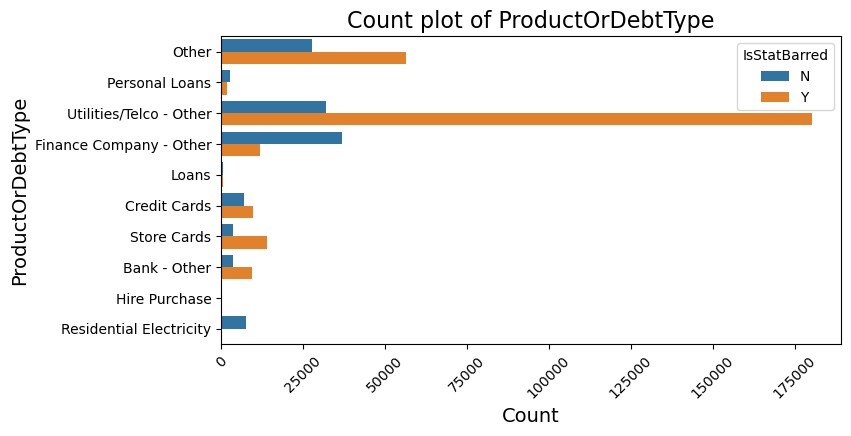

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, y='ProductOrDebtType', hue='IsStatBarred')
plt.xlabel('Count', fontsize=14)
plt.ylabel('ProductOrDebtType', fontsize=14)
plt.title('Count plot of ProductOrDebtType', fontsize=16)
plt.xticks(rotation=45)
plt.show()


In [ ]:
table_data = data.groupby(['ProductOrDebtType', 'IsStatBarred']).size().unstack(fill_value=0).reset_index()

# Rename columns for the table
table_data.columns = ['ProductOrDebtType', 'IsStatBarred_N', 'IsStatBarred_Y']

# Display the table
print(table_data)

         ProductOrDebtType  IsStatBarred_N  IsStatBarred_Y
0             Bank - Other            3611            9419
1             Credit Cards            7071            9820
2  Finance Company - Other           36771           11924
3            Hire Purchase             151             319
4                    Loans             565             695
5                    Other           27746           56472
6           Personal Loans            2593            1716
7  Residential Electricity            7692               1
8              Store Cards            3702           13997
9  Utilities/Telco - Other           31973          180185


- categories, such as 'Utilities/Telco - Other' and 'Other,' have a large number of entities, while 'Personal Loans' and 'Residential Electricity' have relatively fewer entities.
- Utilities/Telco - Other,' have a significant number of stat barred entities ('Y'). In contrast, 'Residential Electricity' has a very low number of stat barred entities ('Y') relative to the total.
-  It's noteworthy that 'Residential Electricity' has a count of 1 for stat barred entities ('Y'). This could be due to data anomalies or limitations and might require further investigation.

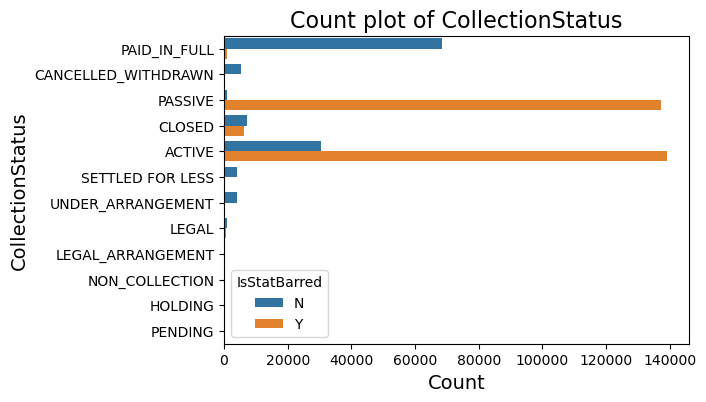

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, y='CollectionStatus', hue='IsStatBarred')
plt.xlabel('Count', fontsize=14)
plt.ylabel('CollectionStatus', fontsize=14)
plt.title('Count plot of CollectionStatus', fontsize=16)
plt.show()


In [ ]:
table_data = data.groupby(['CollectionStatus', 'IsStatBarred']).size().unstack(fill_value=0).reset_index()

# Rename columns for the table
table_data.columns = ['CollectionStatus', 'IsStatBarred_N', 'IsStatBarred_Y']

# Display the table
print(table_data)

       CollectionStatus  IsStatBarred_N  IsStatBarred_Y
0                ACTIVE           30403          139086
1   CANCELLED_WITHDRAWN            5396              93
2                CLOSED            7272            6290
3               HOLDING              52               7
4                 LEGAL             805             754
5     LEGAL_ARRANGEMENT             361               0
6        NON_COLLECTION              34             203
7          PAID_IN_FULL           68364             808
8               PASSIVE             957          137083
9               PENDING              26               1
10     SETTLED FOR LESS            4031             160
11    UNDER_ARRANGEMENT            4174              63


- 'ACTIVE' and 'PASSIVE' have a significant number of stat barred entities, while 'LEGAL_ARRANGEMENT' and 'PENDING' have very few.

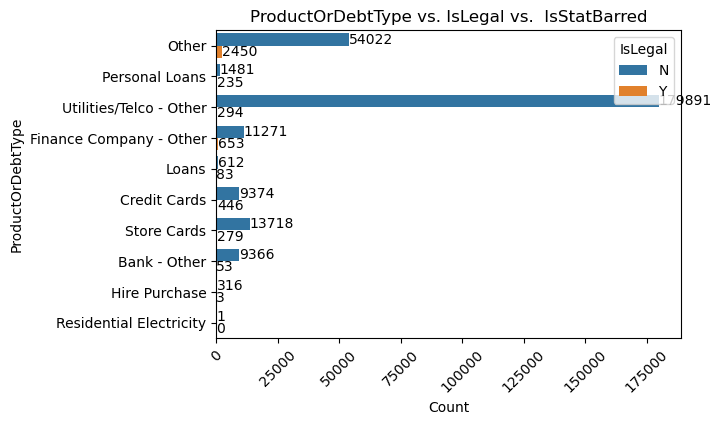

In [ ]:
df=data[data['IsStatBarred']=='Y']
plt.figure(figsize=(6, 4))
ax=sns.countplot(data=df, y='ProductOrDebtType', hue='IsLegal')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('ProductOrDebtType vs. IsLegal vs.  IsStatBarred')
plt.ylabel('ProductOrDebtType')
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.legend(title='IsLegal', loc='upper right')
plt.show()

- store Cards and Finance Company and Other, have a significant number of legal entities ('IsLegal_Y'). In contrast, 'Residential Electricity' has a very low number of legal entities relative to the total.

## Data Preprocessing

In [ ]:
#importing necessary libraries
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier

## LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in clean_data.columns:
    if clean_data[column].dtype==np.number:
        continue
    else:
        clean_data[column]=LabelEncoder().fit_transform(clean_data[column])

C:\Users\HP\AppData\Local\Temp\ipykernel_12428\3866408862.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if clean_data[column].dtype==np.number:
C:\Users\HP\AppData\Local\Temp\ipykernel_12428\3866408862.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if clean_data[column].dtype==np.number:
C:\Users\HP\AppData\Local\Temp\ipykernel_12428\3866408862.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if clean_data[column].dtype==np.number:
C:\Users\HP\AppData\Local\Temp\ipykernel_12428\3866408862.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if clean_data[co

In [ ]:
from sklearn.preprocessing import StandardScaler
X = clean_data.drop(columns=['IsStatBarred'])
Y = clean_data['IsStatBarred']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## random forest model

In [ ]:
model1= RandomForestClassifier(random_state=42)
model1.set_params(criterion = 'gini',
                  max_features = None,
                  max_depth = 12,
                 min_samples_leaf=1,min_samples_split=2)

RandomForestClassifier(max_depth=12, max_features=None, random_state=42)

In [ ]:
model1.set_params(n_estimators=200,
                  bootstrap = True,
                  warm_start=False,
                 oob_score=True)


RandomForestClassifier(max_depth=12, max_features=None, n_estimators=200,
                       oob_score=True, random_state=42)

In [ ]:
model1.fit(X_train,Y_train)
print(model1.score(X_train, Y_train))
y_pred=model1.predict(X_test)
cm=confusion_matrix(Y_test,y_pred)
cm

0.973937220503294


array([[22607,  1702],
       [  722, 56254]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
accuracy=accuracy_score(Y_test,y_pred)
print('accuracy=',accuracy)
precision=precision_score(Y_test,y_pred)
print('precision =',precision)
recall=recall_score(Y_test,y_pred)
print('recall=',recall)

accuracy= 0.9701789998154641
precision = 0.9706328939195251
recall= 0.98732799775344


## LogisticRegression

In [ ]:
model2 = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
model2.fit(X_train, Y_train)
print(model2.score(X_train, Y_train))

# Make predictions on the test data
Y_pred = model2.predict(X_test)

# Evaluate the model

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a classification report
class_report = classification_report(Y_test, y_pred)
print('Classification Report:\n', class_report)

0.8364079252502015
Accuracy: 97.02%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95     24309
           1       0.97      0.99      0.98     56976

    accuracy                           0.97     81285
   macro avg       0.97      0.96      0.96     81285
weighted avg       0.97      0.97      0.97     81285



## XGBClassifier model

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model3 = XGBClassifier(
    max_depth=4,
    learning_rate=0.1,
    n_estimators=500,
    seed=42)

# Train the model on the training data
model3.fit(X_train, Y_train)
print(model3.score(X_train, Y_train))

# Make predictions on the test data
y_pred = model3.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)

0.977575675559301


In [ ]:
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9751737712985176

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     24309
           1       0.98      0.99      0.98     56976

    accuracy                           0.98     81285
   macro avg       0.97      0.97      0.97     81285
weighted avg       0.98      0.98      0.98     81285



## KNeighborsClassifier model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 5  # You can adjust this value
model4 = KNeighborsClassifier(n_neighbors=k)

# Fit the model to the training data
model4.fit(X_train, Y_train)
print(model2.score(X_train, Y_train))
# Make predictions on the test data
y_pred = model4.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:\n", class_report)

# Create and display a confusion matrix
confusion_mat = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

0.8364079252502015
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92     24309
           1       0.96      0.97      0.97     56976

    accuracy                           0.95     81285
   macro avg       0.95      0.94      0.95     81285
weighted avg       0.95      0.95      0.95     81285

Confusion Matrix:
 [[22051  2258]
 [ 1450 55526]]


## GradientBoostingClassifier model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=500, random_state=42)
model5.fit(X_train, Y_train)
print(model5.score(X_train, Y_train))

# Make predictions on the test set
y_pred = model5.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report for more detailed evaluation
classification_rep = classification_report(Y_test, y_pred)
print('Classification Report:\n', classification_rep)

0.97438626060319
Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95     24309
           1       0.98      0.99      0.98     56976

    accuracy                           0.97     81285
   macro avg       0.97      0.96      0.97     81285
weighted avg       0.97      0.97      0.97     81285



## AdaBoostClassifier model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model6 = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
model6.fit(X_train, Y_train)
print(model6.score(X_train, Y_train))

# Make predictions on the test set
y_pred = model6.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report for more detailed evaluation
classification_rep = classification_report(Y_test, y_pred)
print('Classification Report:\n', classification_rep)

0.9609150576063087
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93     24309
           1       0.96      0.98      0.97     56976

    accuracy                           0.96     81285
   macro avg       0.96      0.94      0.95     81285
weighted avg       0.96      0.96      0.96     81285



XGBClassifier model is giving the highest accuracy,f1 score and AUC.

In [ ]:
#Hyper parameter tuning of XGB classifier
param_grid = {
    'learning_rate': [0.1,0.2],
    'max_depth': [2,6],
    'n_estimators': [1000]}
xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_;


Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [ ]:
print(best_params)

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 1000}


In [ ]:
# Evaluate the model's performance using best parameters of hyperparameter Tuning
model3 = XGBClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=1000,
    seed=42)

# Train the model on the training data
model3.fit(X_train, Y_train)
print('Train_accuray: ',model3.score(X_train, Y_train))

# Make predictions on the test data
y_pred = model3.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)
print(f"Test_Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_rep)

Train_accuray:  0.985323155091069
Test_Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     24309
           1       0.98      0.99      0.98     56976

    accuracy                           0.98     81285
   macro avg       0.97      0.97      0.97     81285
weighted avg       0.98      0.98      0.98     81285



In [ ]:
print(f"Test_Accuracy: {accuracy}")
cm=confusion_matrix(Y_test,y_pred)
print(cm)

Test_Accuracy: 0.9763424986159808
[[23214  1095]
 [  828 56148]]


after applying hyperparameter tuning on xgb classifier model our accuracy,f1 score ,precision and recall incresed.so for our final model we are going to use xgb classifier with tuning.

In [ ]:
# Calculate accuracy, F1 score, and AUC of all models

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
model_metrics = []

models = [('RandomForestClassifier',model1),('LogisticRegression',model2),('XGboost',model3),('KNN_Classsification',model4),
          ('Gradient Boosting',model5),('ADABOOST',model6)]

for model_name, model in models:
    model.fit(X_train, Y_train)
    Train_accuracy=model.score(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    Test_accuracy = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_prob)

    model_metrics.append([model_name,Train_accuracy,Test_accuracy, f1, auc])
metrics_df = pd.DataFrame(model_metrics, columns=['Model', 'Train_accuracy','Test_accuracy' ,'F1 Score', 'AUC'])


In [ ]:
# Display the table of model performance metrics
print(metrics_df)

                    Model  Train_accuracy  Test_accuracy  F1 Score       AUC
0  RandomForestClassifier        0.973937       0.970179  0.978909  0.993459
1      LogisticRegression        0.836408       0.835603  0.888447  0.872200
2                 XGboost        0.985323       0.976342  0.983164  0.996071
3     KNN_Classsification        0.965815       0.954383  0.967689  0.975537
4       Gradient Boosting        0.974386       0.972639  0.980586  0.994748
5                ADABOOST        0.960915       0.958935  0.971052  0.990410


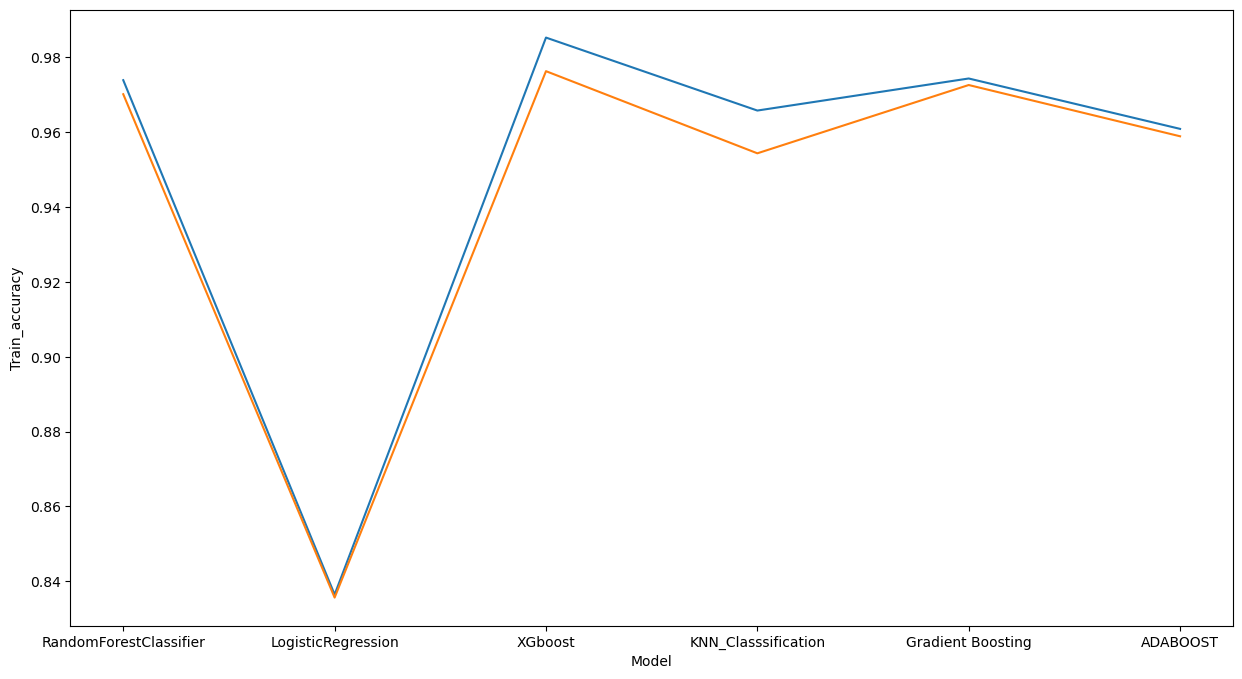

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=metrics_df,x='Model',y='Train_accuracy')
sns.lineplot(data=metrics_df,x='Model',y='Test_accuracy')
plt.show()


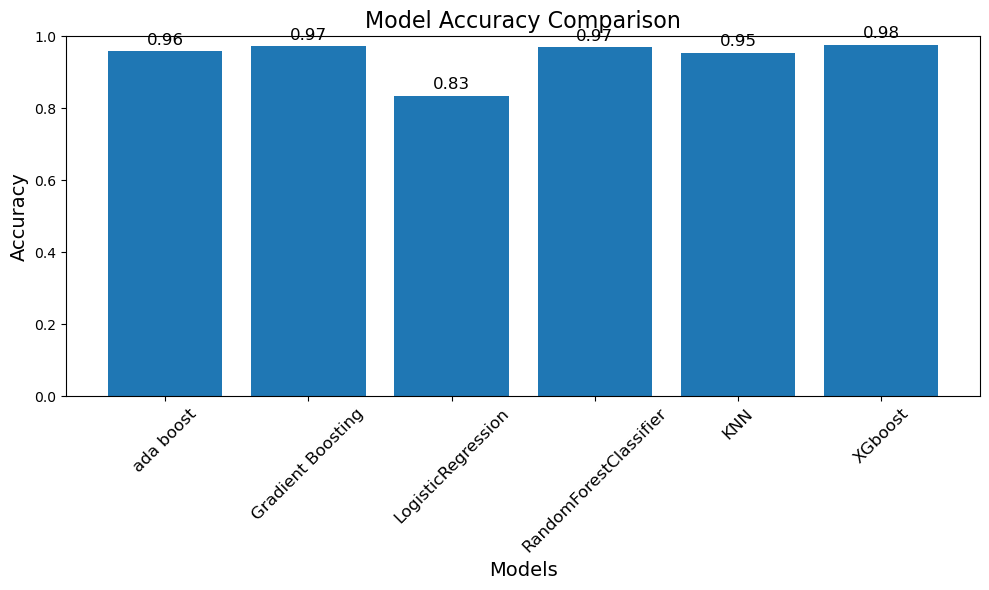

In [ ]:
#plotting Model Accuracy Comparison
model_names = ['ada boost','Gradient Boosting','LogisticRegression','RandomForestClassifier','KNN','XGboost']
accuracies = [0.958,0.972,0.835,0.97,0.954,0.976]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
for i, score in enumerate(accuracies):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Customize the chart
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)  # Set the y-axis limit (0 to 1)
plt.xticks(rotation=45, fontsize=12)

# Show the chart
plt.tight_layout()
plt.show()

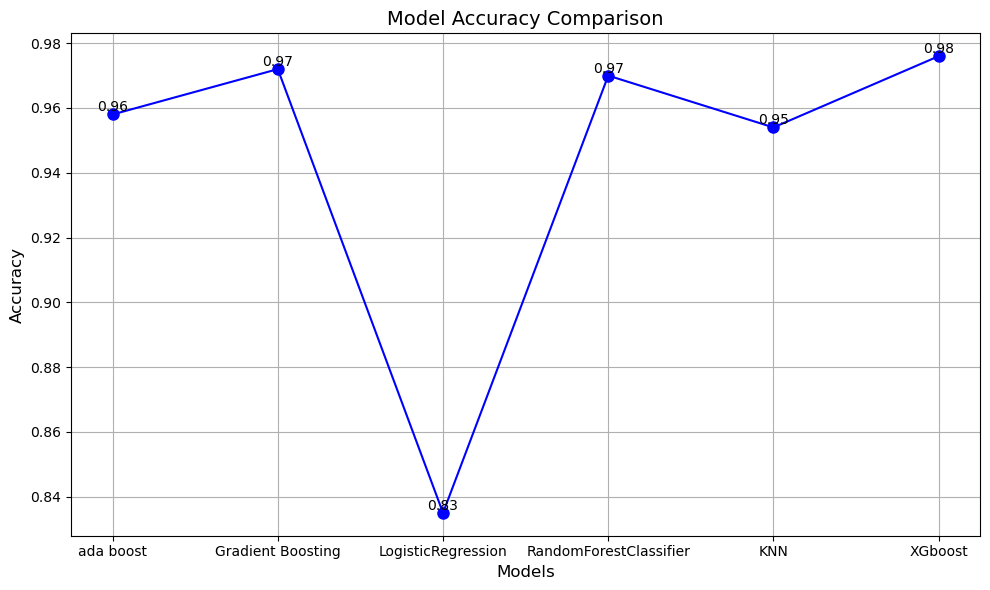

In [ ]:
#Model Accuracy Comparison
model_names = ['ada boost','Gradient Boosting','LogisticRegression','RandomForestClassifier','KNN','XGboost']
accuracies = [0.958,0.972,0.835,0.97,0.954,0.976]

plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o', linestyle='-', color='b', markersize=8)


plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14)

for i in range(len(model_names)):
    plt.text(model_names[i], accuracies[i], f'{accuracies[i]:.2f}', ha='center', va='bottom', fontsize=10)

# Show the chart
plt.grid(True)
plt.tight_layout()
plt.show()

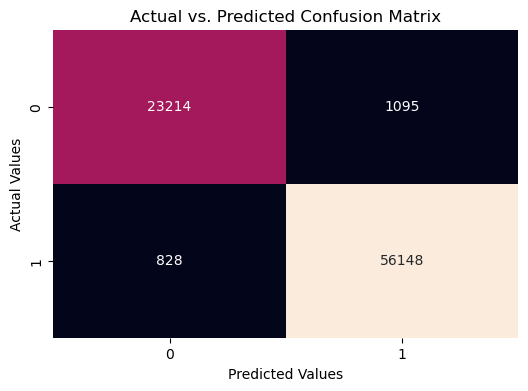

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

## FEATURE IMPORTANCE

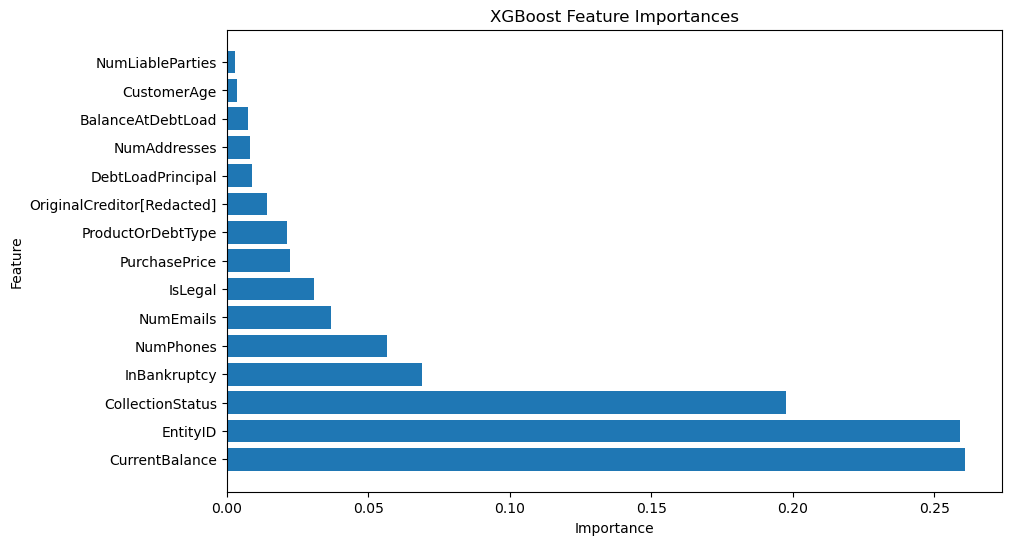

In [ ]:
importances = model3.feature_importances_

# Get the names of the features (assuming they are stored in a list called 'feature_names')
feature_names = ['EntityID', 'OriginalCreditor[Redacted]', 'CurrentBalance',
       'DebtLoadPrincipal', 'BalanceAtDebtLoad', 'PurchasePrice',
       'ProductOrDebtType', 'CollectionStatus', 'InBankruptcy',
       'IsLegal', 'NumLiableParties', 'CustomerAge', 'NumPhones', 'NumEmails',
       'NumAddresses']

# Create a DataFrame to hold the feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importances')
plt.show()

Based on the summary plot, it shows that current balance , entityid and  collection status give the most impact on the model decision.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Here we calculate the test error rate!
test_error_rate = 1 - accuracy
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate))

The test error rate for our model is:
  0.0237


## Area Under Curve (AUC)

In [ ]:
predictions_prob = model3.predict_proba(X_test)[:, 1]

fpr2, tpr2,_ = roc_curve(Y_test,
                          predictions_prob,
                          pos_label = 1)
auc=auc(fpr2,tpr2)
auc

0.9960589069265685

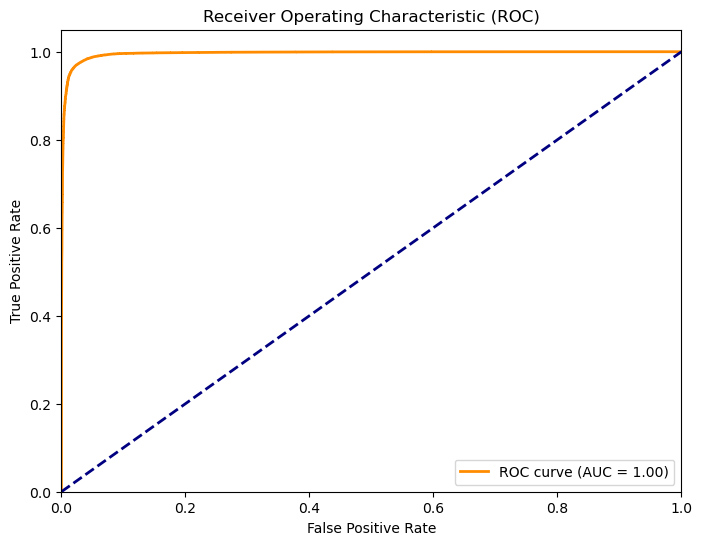

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


The Receiver Operating Characteristic (ROC) curve illustrates the trade-off between the true positive rate (sensitivity) and false positive rate (1-specificity) across different thresholds. With an Area Under the Curve (AUC) of 0.996, our model demonstrates reasonably good discriminative power.